# Readme
Predicting house prices by using on k-fold-cross validation (manually)

# Imports

In [242]:
import pandas as pd
import math
import numpy as np

from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Get + clean the data

In [5]:
# load the data
dc_listings = pd.read_csv('../data/dc_airbnb.csv')

In [ ]:
# clean it
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

In [136]:
# shuffe
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]

dc_listings.reset_index(drop=True, inplace=True)

In [24]:
# get train + test
split_one = dc_listings[0:1862]

split_two = dc_listings[1862:]


# set one
train_one = split_one
test_one = split_two

# set two
train_two = split_two
test_two = split_one

# Define Functions

In [34]:
def get_rmse(features, train_data, test_data, target_column):
    knn = KNeighborsRegressor()
    knn.fit(train_data[features], train_data[target_column])
    predictions = knn.predict(test_data[features])
    
    return (mean_squared_error(test_data[target_column], predictions))**(1/2)

# 2-fold cross-validation with set_one + set_two
* one feature: accommodates 
* k = 5
* algo = 'auto'

## General stuff

In [32]:
target_column = 'price'
features = ['accommodates']

***

## Iteration One

In [40]:
iteration_one_rmse = get_rmse(features, train_one, test_one, target_column)

print(iteration_one_rmse)

133.1814886130524


## Iteration Two

In [41]:
iteration_two_rmse = get_rmse(features, train_two, test_two, target_column)

print(iteration_two_rmse)

128.30212631759252


## Get avg

In [50]:
avg_rmse = np.mean([iteration_one_rmse, iteration_two_rmse])

avg_rmse

130.74180746532247

# 5-fold cross-validation
Assign each row in the core dataset its corresponding fold

## Assign the folds

In [144]:
# manually define the folds with its from/to indices for pandas 

fold_ranges = {
    1: {
        'from': 0
        , 'to': 744
    }
    , 2: {
        'from': 745
        , 'to': 1489
    }
    , 3: {
        'from': 1490
        , 'to': 2233
    }
    , 4: {
        'from': 2234
        , 'to': 2977
    }
    , 5: {
        'from': 2978
        , 'to': 3722
    }
}

# assign the indices to the data
for fold, ranges in fold_ranges.items():
    dc_listings.loc[ranges.get('from'):ranges.get('to'), 'fold'] = fold

{1: {'from': 0, 'to': 744}, 2: {'from': 745, 'to': 1489}, 3: {'from': 1490, 'to': 2233}, 4: {'from': 2234, 'to': 2977}, 5: {'from': 2978, 'to': 3722}}


## Check if the folds make sense

In [146]:
# each fold should have roughly same size
dc_listings.fold.value_counts()

5.0    745
2.0    745
1.0    745
4.0    744
3.0    744
Name: fold, dtype: int64

In [158]:
# each column should have one fold

# calc number of nulls
assert  (dc_listings.fold.isna().sum() / dc_listings.shape[0])*100 == 0

# Run k-fold cross validation where
* k = 5
* features = ['accommodats']
* test_fold = 1
* iteration_one_rmse holds the rmse
* target_column = 'price'

In [215]:
all_folds = [x for x in range(1, 6)]

In [182]:
test_fold = 1
train_folds = all_folds
train_folds.remove(test_fold)

train_set = dc_listings[dc_listings['fold'].isin(train_folds)]
test_set = dc_listings[dc_listings['fold']==test_fold]

assert(train_set.shape[0] + test_set.shape[0] == dc_listings.shape[0])

In [184]:
target_column = 'price'

In [187]:
knn = KNeighborsRegressor()
knn.fit(train_set[features], train_set[target_column])
predictions = knn.predict(test_set[features])
iteration_one_rmse = (mean_squared_error(test_set[target_column], predictions))**(1/2)

print(iteration_one_rmse)

130.63924402926142


In [244]:
def train_and_validate(df, folds, features=['accommodates'], target_column='price'):
    """Trains n models, whereas n = len(folds) and returns a list with rmse for each iteration
    df: original df, not splitted
    rmse list: contains rmse for each fold
    """
    all_rmse = list()
    
    core_data = df.copy()
    
    # split the data
    for fold in folds:
        # use copy() to assign by value not reference
        train_folds = folds.copy()
        train_folds.remove(fold)
        
        train_set = core_data[core_data['fold'].isin(train_folds)]
        
        # fyi: test_fold = fold
        test_set = core_data[core_data['fold']==fold]
    
        knn = KNeighborsRegressor()
        knn.fit(train_set[features], train_set[target_column])
        predictions = knn.predict(test_set[features])
        all_rmse.append((mean_squared_error(test_set[target_column], predictions))**(1/2))
    
    return all_rmse

In [249]:
rmses = train_and_validate(dc_listings, all_folds)
print(rmses)
print(np.mean(rmses))

[130.63924402926142, 224.59166562554447, 143.65884412253794, 128.6387962182215, 119.75940578997454]
149.45759115710797


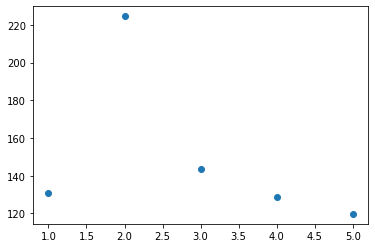

In [243]:
plt.scatter(all_folds, rmses)